<a href="https://colab.research.google.com/github/Kamraaan1/BDA/blob/main/Lab09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> <font color='black'> Business Data Analytics</font></center></h1>
<h2><center> <font color='black'> cross-sell/Up-sell: Neural networks + Embeddings.
</font></center></h3>
<h2><center> <font color='black'> University of Tartu </font></center></h3>

In today's lab session we will talk about `Neural Network (Deep Learning)` basics and will try to solve two different problem such as `customer shurn prediction` and `recommendation sysytem` using it.


* Outline:
    * Neural Network basics
    * Churn Prediction
    * Recommendation system

## Part 1 - Neural network basics:

* An **artificial neural network (ANN)** is a `copy` of human brain and its neurons with the goal of making a computer think and learn like a real brain does. The `neuron` is the basic building block of artificial neural network. The neuron is composed by three important parts:
    * A **cell body,** that is the heart of neuron and directs all activities,
    * The **dendrites** that are the receiver of the signals from other neurons and relay those messages to the cell body and
    * The **axon**, that is the transmitter of the signals to dendrites of other neurons.

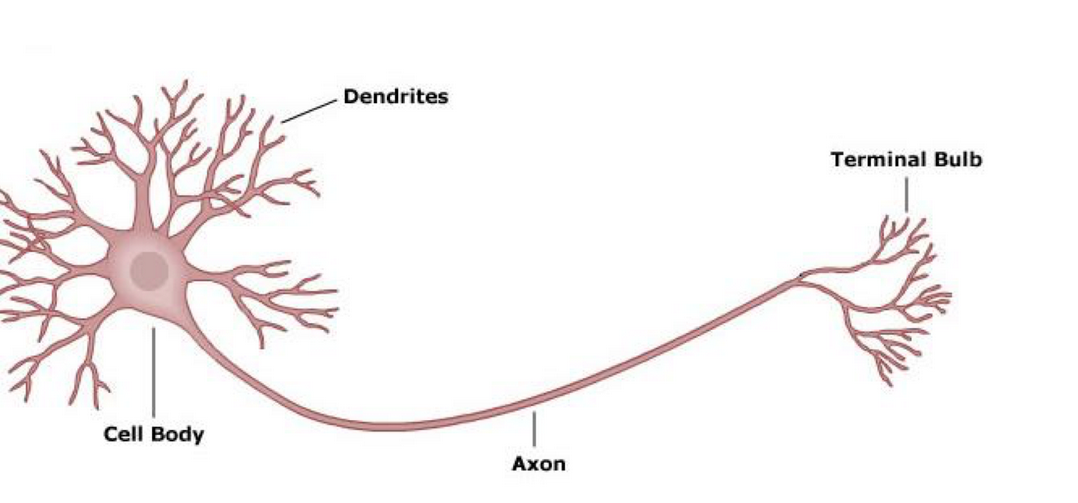

In [ ]:
from IPython.display import Image
Image(filename='nn.png') 

**A neuron** represent `a node` in our ANN and the **axon** represents the `weights.`

#### How does the ANN works?

* An ANN works with `inputs`, `nodes`, `layers`, `weights` and `outputs`.

* Basically we give the `inputs` (from training data) and we receive, after some calculations, the outputs. 

* The layers are composed by nodes. Each ANN can have multiple layers and multiple nodes for each layer. We have the first layer (starting point of our ANN) that is called the `input layer` and the `output layer`, that is the final layers that gives us the output. All the layers between the input layer and the output layer, are called `hidden layers` because we can’t see their output even if they are a working part of the model.

* The `input layer` contains our variables (features) in its nodes, `so we will have as many nodes as the number of our variables.` We have to consider that every calculation of the output is related to every single line of our database.

* The `node (or neuron)` receives in input all the `weighted output of the previous layer` and here are made **two** steps.
    * `The first step` is the sum of all input and,
    * `the second step` is the application of the **activation function (Relu, Sigmoid)** with this value that generated the output of the node. 
    
* Basically for the input layer, we do not need any activation function, but our input is already the output of the node. This process continue from layer to layer till the last layer that gives us the actual output.

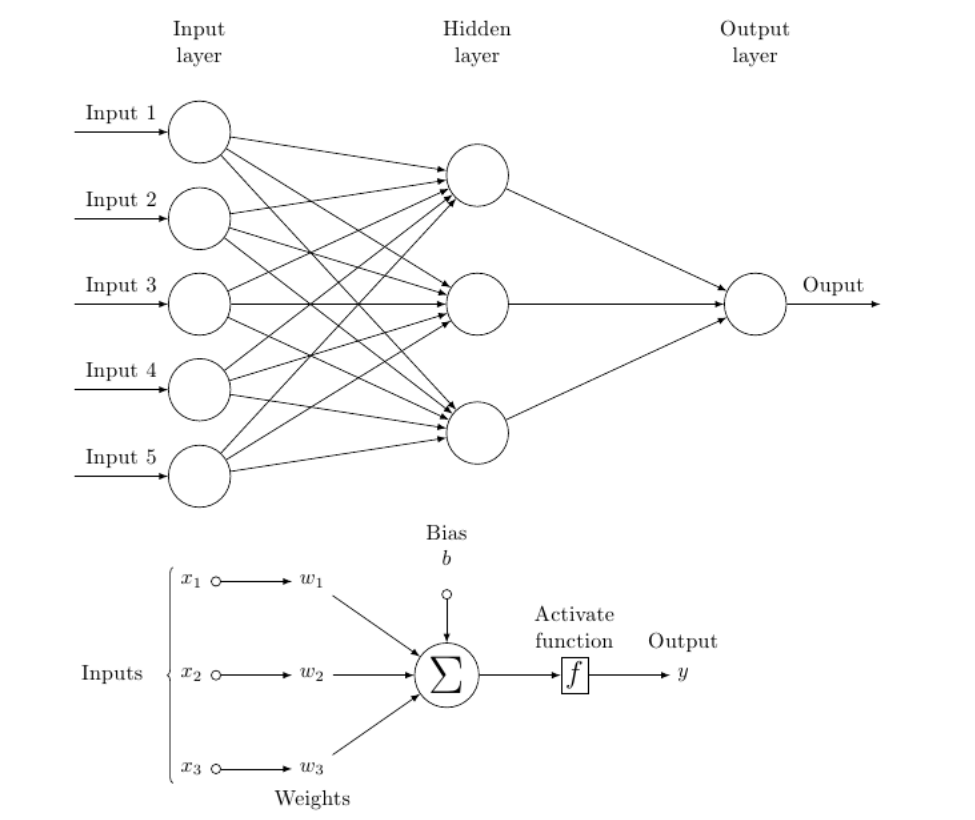

In [ ]:
from IPython.display import Image
Image(filename='nn4.png')

#### Terminologies:

1. **Epochs**: One Epoch is when an `ENTIRE` dataset is passed `forward and backward` through the neural network only ONCE. Since one epoch is too big to feed to the computer at once we divide it in several smaller batches. As the number of epochs increases, more number of times the weight are changed in the neural network and the curve goes from underfitting to optimal to overfitting curve.

2. **Batch Size**: Total number of training examples present in a single batch. `Batch size` and `number of batches` are two different things.


3. **Iterations**: Iterations is the number of batches needed to complete one epoch. The number of batches is equal to number of iterations for one epoch.


**Example:** Let’s say we have `2000` training examples (rows) that we are going to use.
   * We can divide the dataset of 2000 examples into $4$ `batches of 500` then it will take `4 iterations` to complete `1 epoch.`
   

    
    

#### Top Neural networks (deep learning) frameworks: 
1. [TensorFlow](https://www.tensorflow.org/)
2. [PyTorch](https://pytorch.org/)
3. [Keras](https://keras.io/)
4. [Sonet](https://github.com/deepmind/sonnet)
5. and so on ......


#### So, Which Deep Learning Framework Should You Use?
1. If you are just starting out and want to figure out what’s what, the best choice is **Keras.**
2. For research purposes, choose **PyTorch.**
3. For production, you need to focus on the environment. So, for Google Cloud, the best choice is **TensorFlow,** for AWS — MXNet and Gluon.
4. Android developers should pay attention to **D4LJ**, for iOS, a similar range of tasks is compromised by Core ML.
5. Finally, **ONNX** will help with questions of interaction between different frameworks.

## Part 2 -  Customer churn prediction using ANN

1. Data Preprocessing
2. Build the ANN!
3. Making the predictions and evaluating the model

In [ ]:
import numpy
import pandas as pd


from keras.models import Sequential # used to build a sequential layer
from keras.layers import Dense # Dense layer to initilize weights
from keras.wrappers.scikit_learn import KerasClassifier  # classifier from keras

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

seed = 7 # reproduce results
numpy.random.seed(seed)


# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline



## 1. Data pre-processing

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* Looking at the data we can see the first three columns have no useful information so we can drop them.



In [ ]:
# features
X = dataset.iloc[:, 3:13].values

In [ ]:
# label/target variable
y = dataset.iloc[:, 13].values

* Encoding categorical datd: Now we encode the string values in the features to numerical values as a ML Algorithm can only work on numbers and not on string values.The only 2 values are `Gender and Region` which need to converted into numerical data

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder() # Geography
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

labelencoder_X_2 = LabelEncoder() #
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

* Now the Country names are replaced by 0,1 and 2 while male and female are replaced by 0 and 1.

* Create dummy variable in python. LabelEncoder has replaced France with 0, Germany 1 and Spain 2 but Germany is not higher than France and France is not smaller than Spain so we need to create a dummy variable for Country.

In [ ]:
X = pd.get_dummies(pd.DataFrame(X), columns = [1, 2])
# X = df_dummies.values
# X

In [ ]:
X.shape

(10000, 13)

In [ ]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Normalize features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(8000, 13)

## 2. Build the ANN

Listing out the steps involved in training the ANN with Stochastic Gradient Descent:-
1. Randomly initialize the **weights** to small numbers close to 0(But not 0).
2. Input the 1st observation of your dataset in the Input Layer, each Feature in one Input Node.
3. Forward-Propagation from Left to Right, the neurons are activated in a way that the impact of each neuron’s activation. is limited by the weights.Propagate the activations until getting the predicted result y.
4. Compare the predicted result with the actual result. Measure the generated error.
5. Back-Propagation: From Right to Left, Error is back propagated.Update the weights according to how much they are responsible for the error.The Learning Rate tells us by how much such we update the weights.
6. Repeat Steps 1 to 5 and update the weights after each observation(Reinforcement Learning).Or: Repeat Steps 1 to 5 but update the weights only after a batch of observations(Batch Learning).
7. When the whole training set is passed through the ANN.That completes an Epoch. Redo more Epochs.

In [ ]:
#Importing the Keras libraries and packages
import keras
#For building the Neural Network layer by layer
from keras.models import Sequential
#To randomly initialize the weights to small numbers close to 0(But not 0)
from keras.layers import Dense


* Initializing the ANN: So there are actually 2 ways of initializing a deep learning model:
    * Defining each layer one by one
    * Defining a Graph

In [ ]:
#We did not put any parameter in the Sequential object as we will be defining the Layers manually
classifier = Sequential()

* Adding the input layer and the first hidden layer:

    * This remains an unanswered question till date that how many nodes of the hidden layer do we actually need? There is no thumb rule but you can set the number of nodes in Hidden Layers as an Average of the number of Nodes in Input and Output Layer Respectively.(Works in 90% of the cases!!)
    * Here avg= (13+1)/2==>7 So set Output Dim=7
    * Init will initialize the Hidden Layer weights uniformly
    * Activation Function is Rectifier Activation Function(Relu)

* Input dim tells us the number of nodes in the Input Layer.This is done only once and wont be specified in further layers.

In [ ]:
#classifier = Sequential()

# # Input Layer
classifier.add(Dense(7, input_dim=13, activation='relu'))

# #Adding the second layer of the ANN (first hidden layer)
classifier.add(Dense(7,  activation='relu'))

# .....

# #Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


* `Sigmoid activation function` is used whenever we need Probabilities of 2 categories or less(Similar to Logistic Regression) Switch to `Softmax` when the dependent variable has more than 2 categories.

* `Adam` is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

Epoch 1/30
536/536 [==============================] - 2s 2ms/step - loss: 0.5652 - accuracy: 0.7286 - val_loss: 0.4567 - val_accuracy: 0.7978
Epoch 2/30
536/536 [==============================] - 1s 2ms/step - loss: 0.4388 - accuracy: 0.8040 - val_loss: 0.4405 - val_accuracy: 0.8073
Epoch 3/30
536/536 [==============================] - 1s 1ms/step - loss: 0.4244 - accuracy: 0.8156 - val_loss: 0.4327 - val_accuracy: 0.8175
Epoch 4/30
536/536 [==============================] - 1s 1ms/step - loss: 0.4149 - accuracy: 0.8238 - val_loss: 0.4281 - val_accuracy: 0.8175
Epoch 5/30
536/536 [==============================] - 1s 2ms/step - loss: 0.4142 - accuracy: 0.8318 - val_loss: 0.4244 - val_accuracy: 0.8145
Epoch 6/30
536/536 [==============================] - 1s 2ms/step - loss: 0.3955 - accuracy: 0.8414 - val_loss: 0.4164 - val_accuracy: 0.8247
Epoch 7/30
536/536 [==============================] - 1s 2ms/step - loss: 0.3962 - accuracy: 0.8436 - val_loss: 0.4088 - val_accuracy: 0.8262
Epoch 

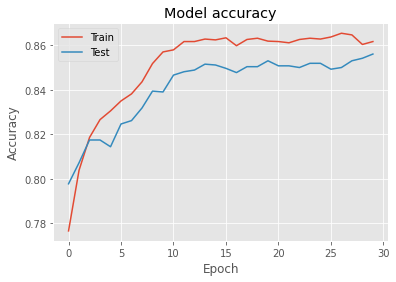

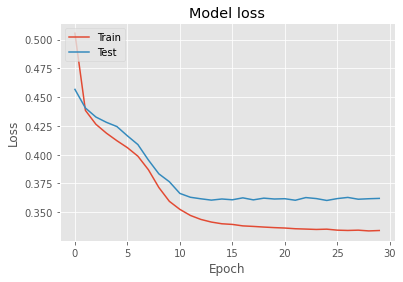

In [ ]:

#Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


#Fitting the ANN to the Training set
#classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 10)
history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 30)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Diagnosing Model Behavior

* The shape and dynamics of a learning curve can be used to diagnose the behavior of a machine learning model and in turn perhaps suggest at the type of configuration changes that may be made to improve learning and/or performance.

* There are three common dynamics that you are likely to observe in learning curves; they are:

    1. **Underfit:** refers to a model that cannot learn the training dataset. An underfit model can be identified from the learning curve of the `training loss only.`
      * It may show a flat line or noisy values of relatively high loss, indicating that the model was unable to learn the training dataset at all.
      * An underfit model may also be identified by a training loss that is decreasing and continues to decrease at the end of the plot. This indicates that the model is capable of further learning and possible further improvements and that the training process was halted prematurely.
    2. **Overfit:** refers to a model that has learned the training dataset too well, including the statistical noise or random fluctuations in the training dataset.
      * The plot of training loss continues to decrease with experience.
      * The plot of validation loss decreases to a point and begins increasing again.

    3. **Good Fit:** is the goal of the learning algorithm and exists between an overfit and underfit model. A good fit is identified by `a training and validation loss` that decreases to a point of stability with a minimal gap between the two final loss values.
      * The plot of training loss decreases to a point of stability.
      * The plot of validation loss decreases to a point of stability and has a small gap with the training loss.





* `A loss function` is used to optimize a machine learning algorithm.The loss is calculated on training and validation and its interpretation is based on how well the model is doing in these two sets.It is the sum of errors made for each example in training or validation sets. Loss value implies how poorly or well a model behaves after each iteration of optimization.

* `An accuracy metric` is used to measure the algorithm’s performance in an interpretable way. Accuracy of a model is usually determined after the model parameters and is calculated in the form of a percentage. It is the measure of how accurate your model's prediction is compared to the true data.

## 3.Making the predictions and evaluating the model

In [ ]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

#if y_pred is larger than 0.5 it returns true(1) else false(2)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [ ]:
#Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1490  105]
 [ 191  214]]


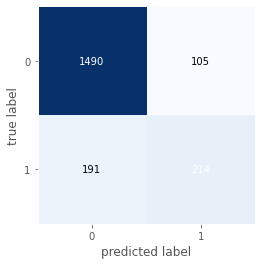

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
accuracy=(1490+214)/2000 #Obtained from Confusion Matrix
print(accuracy)

0.858


## Part 3: Deep Learning With Keras - Recommender Systems

* In this part we’ll use deep learning with Keras framework to build a `recommender system.` This use case is much less common in deep learning literature than things like image classifiers or text generators, but may arguably be an even more common problem. In fact, as you’ll see below, it’s debatable whether this topic even qualifies as `deep learning` because we’re going to see how to build a pretty good recommender system without using a neural network at all! We will, however, take advantage of the power of a modern computation framework like Keras to implement the recommender with minimal code. We’ll try a couple different approaches using a technique called `collaborative filtering.` Finally we’ll build a true neural network and see how it compares to the collaborative filtering approach.

* We will use the same data set we used in the previous lab session.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
 
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


The data is tabular and consists of a user ID, a movie ID, and a rating (there’s also a timestamp but we won’t use it for this task). **Our task** `is to predict the rating for a user/movie pair`, with the idea that if we had a model that’s good at this task then we could predict how a user would rate movies they haven’t seen yet and recommend movies with the highest predicted rating.

In [ ]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


* To get a better sense of what the data looks like, we can turn it into a table by selecting the top 15 users/movies from the data and joining them together. The result shows how each of the top users rated each of the top movies.

In [ ]:
g = ratings.groupby('userId')['rating'].count()
top_users = g.sort_values(ascending=False)[:15]


g = ratings.groupby('movieId')['rating'].count()
top_movies = g.sort_values(ascending=False)[:15]

top_r = ratings.join(top_users, rsuffix='_r', how='inner', on='userId')
top_r = top_r.join(top_movies, rsuffix='_r', how='inner', on='movieId')

pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,1,110,260,296,318,356,480,527,589,593,608,1196,1198,1270,2571
userId,,,,,,,,,,,,,,,
15,2.0,3.0,5.0,5.0,2.0,1.0,3.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0
30,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,3.0
73,5.0,4.0,4.5,5.0,5.0,5.0,4.0,5.0,3.0,4.5,4.0,5.0,5.0,5.0,4.5
212,3.0,5.0,4.0,4.0,4.5,4.0,3.0,5.0,3.0,4.0,NaN,NaN,3.0,3.0,5.0
213,3.0,2.5,5.0,NaN,NaN,2.0,5.0,NaN,4.0,2.5,2.0,5.0,3.0,3.0,4.0
294,4.0,3.0,4.0,NaN,3.0,4.0,4.0,4.0,3.0,NaN,NaN,4.0,4.5,4.0,4.5
311,3.0,3.0,4.0,3.0,4.5,5.0,4.5,5.0,4.5,2.0,4.0,3.0,4.5,4.5,4.0
380,4.0,5.0,4.0,5.0,4.0,5.0,4.0,NaN,4.0,5.0,4.0,4.0,NaN,3.0,5.0
452,3.5,4.0,4.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,2.0


* To build our `first collaborative filtering model`, we need to take care of a few things:

    * first. The user/movie fields are currently non-sequential integers representing some unique ID for that entity. We need them to be sequential starting at zero to use for modeling (you’ll see why later). We can use scikit-learn’s LabelEncoder class to transform the fields.
    * We’ll also create variables with the total number of unique users and movies in the data, as well as the min and max ratings present in the data, for reasons that will become apparent shortly.

In [ ]:
user_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings['userId'].values)
n_users = ratings['user'].nunique()

item_enc = LabelEncoder()
ratings['movie'] = item_enc.fit_transform(ratings['movieId'].values)
n_movies = ratings['movie'].nunique()

ratings['rating'] = ratings['rating'].values.astype(np.float32)
min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])


n_users, n_movies, min_rating, max_rating

(671, 9066, 0.5, 5.0)

* Create a traditional (X, y) pairing of data and label, then split the data into training and test data sets.

In [ ]:
X = ratings[['user', 'movie']].values
y = ratings['rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90003, 2), (10001, 2), (90003,), (10001,))

* Another constant we’ll need for the model is the `number of factors per user/movie.` This number can be whatever we want, however for the collaborative filtering model it does need to be the same size for both users and movies.

* Finally, we need to turn users and movies into separate arrays in the training and test data. This is because in Keras they’ll each be defined as distinct inputs, and the way Keras works is each input needs to be fed in as its own array.

In [ ]:
n_factors = 50
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

* Now we get to the model itself. The main idea here is we’re going to use `embeddings` to represent each user and each movie in the data.


* These `embeddings will be vectors (of size n_factors)` that start out as random numbers but are fit by the model to capture the essential qualities of each user/movie.

* We can accomplish this by computing the `dot product between a user vector and a movie vector` to get a predicted rating. The code is fairly simple, there isn’t even a traditional neural network layer or activation involved. Notice that this is where we need the number of unique users and movies, since those are required to define the size of each embedding matrix.

In [ ]:
from keras.models import Model
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.regularizers import l2


# using only embeddings, same as previous lab session
def RecommenderV1(n_users, n_movies, n_factors):
    # users
    user = Input(shape=(1,))
    u = Embedding(n_users, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(user)
    u = Reshape((n_factors,))(u)

    # movies      
    movie = Input(shape=(1,))
    m = Embedding(n_movies, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(movie)
    m = Reshape((n_factors,))(m)
          
    x = Dot(axes=1)([u, m])   

    # ANN
    model = Model(inputs=[user, movie], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

* This is kind of a neat example of how flexible and powerful modern computation frameworks like Keras and PyTorch are. Even though these are billed as deep learning libraries, they have the building blocks to quickly create any computation graph you want and get automatic differentiation essentially for free. Below you can see that all of the parameters are in the embedding layers, `we don’t have any traditional neural net components at all.`

In [ ]:
def compile_fit_plot(model,num):
    model.summary()


    model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    history = model.fit(x=X_train_array, y=y_train, batch_size=64, epochs=30,
                        verbose=1, validation_data=(X_test_array, y_test))
    # Plot training & validation accuracy values
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title('Model MSE')
    plt.ylabel('mean_squared_error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    import math
    # Show the best validation RMSE
    min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(history.history['val_loss']))
    print(f"\nModel: {num},\nMinimum RMSE at epoch: {idx+1} = {math.sqrt(min_val_loss)}")
    #print ('\nModel: {:d}\n'.format(num),'Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(math.sqrt(min_val_loss)))
    



def predict_recommend(model,test_user ):
    
        # Function to predict the ratings given User ID and Movie ID
    def predict_rating1(user_id, item_id):
        return model.predict([np.array([user_id-1]), np.array([item_id-1])])[0][0]
    
    # Function to predict the ratings given User ID and Movie ID
    def predict_rating2(user_id, item_id):        
        if item_id<9066:
            prediction = model.predict([np.array([user_id-1]), np.array([item_id])])[0][0]
            return prediction
        
    TEST_USER = test_user # A random test user (user_id = 2000)


    user_ratings = ratings[ratings['userId'] == TEST_USER][['userId', 'movieId', 'rating']]

    user_ratings['prediction'] = user_ratings.apply(lambda x: predict_rating1(TEST_USER, x['movieId']), axis=1)
    user_ratings.sort_values(by='rating', 
                             ascending=False).merge(movies, 
                                                    on='movieId', 
                                                    how='inner', 
                                                    suffixes=['_u', '_m']).head(20)
    
    recommendations = ratings[ratings['movieId'].isin(user_ratings['movieId']) == False][['movieId']].drop_duplicates()
    recommendations['prediction'] = recommendations.apply(lambda x: predict_rating2(TEST_USER, x['movieId']), axis=1)
    recommendations.sort_values(by='prediction',
                              ascending=False).merge(movies,
                                                     on='movieId',
                                                     how='inner',
                                                     suffixes=['_u', '_m']).head(20)
    
    return user_ratings, recommendations




    

    

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 50)        33550       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 50)        453300      input_2[0][0]                    
______________________________________________________________________________________________

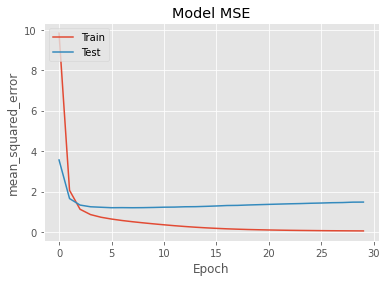

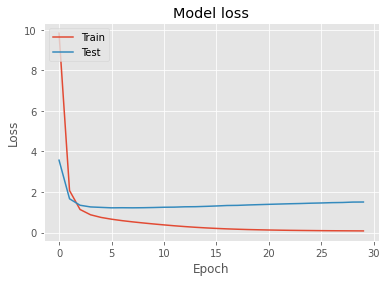


Model: 1,
Minimum RMSE at epoch: 6 = 1.1049340778209151


In [ ]:
# Define constants
#K_FACTORS = 100 # The number of dimensional embeddings for movies and users
TEST_USER = 10 # A random test user (user_id = 2000)


model1 = RecommenderV1(n_users, n_movies, n_factors)
compile_fit_plot(model1, 1)

user_ratings_1, recommendations_1 = predict_recommend(model1,TEST_USER)

In [ ]:
user_ratings_1

,userId,movieId,rating,prediction
744,10,50,5.0,2.865839
745,10,152,4.0,3.449195
746,10,318,4.0,3.175482
747,10,344,3.0,3.075367
748,10,345,4.0,2.673200
749,10,592,3.0,3.519424
750,10,735,4.0,3.552411
751,10,1036,3.0,3.853777
752,10,1089,3.0,3.184276
753,10,1101,2.0,4.254097


In [ ]:
recommendations_1

,movieId,prediction
0,31,4.106885e+00
1,1029,3.316940e+00
2,1061,7.968656e-31
3,1129,2.399830e+00
4,1172,2.950596e+00
...,...,...
99131,64997,NaN
99159,72380,NaN
99274,129,3.657804e+00
99678,4736,4.598809e+00


* Not bad for a first try. We can make some improvements though. The first thing we can do is add a `bias` to each embedding. The concept is similar to the bias in a fully-connected layer or the intercept in a linear model. It just provides an extra degree of freedom. `We can implement this idea using new embedding layers with a vector length of one. The bias embeddings get added to the result of the dot product.`

* The second improvement we can make is `running the output of the dot product through a sigmoid layer and then scaling the result using the min and max ratings in the data.` This is a neat technique that introduces a non-linearity into the output and results in a modest performance bump.

* We also refactored the code a bit by pulling out the embedding layer and reshape operation into a separate class.

In [ ]:
from keras.layers import Add, Activation, Lambda
class EmbeddingLayer:
    def __init__(self, n_items, n_factors):
        self.n_items = n_items
        self.n_factors = n_factors
    
    def __call__(self, x):
        x = Embedding(self.n_items, self.n_factors, embeddings_initializer='he_normal',
                      embeddings_regularizer=l2(1e-6))(x)
        x = Reshape((self.n_factors,))(x)
        return x
    
    
def RecommenderV2(n_users, n_movies, n_factors, min_rating, max_rating):
    # users
    user = Input(shape=(1,))
    u = EmbeddingLayer(n_users, n_factors)(user)
    ub = EmbeddingLayer(n_users, 1)(user) # 1st improvement
    # movies
    movie = Input(shape=(1,))
    m = EmbeddingLayer(n_movies, n_factors)(movie)
    mb = EmbeddingLayer(n_movies, 1)(movie) # 1snd improvement
    
    x = Dot(axes=1)([u, m])
    x = Add()([x, ub, mb])
    x = Activation('sigmoid')(x) # 2nd improvement
    
    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)  
    model = Model(inputs=[user, movie], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt) 
    return model

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 50)        33550       input_3[0][0]                    
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 1, 50)        453300      input_4[0][0]                    
____________________________________________________________________________________________

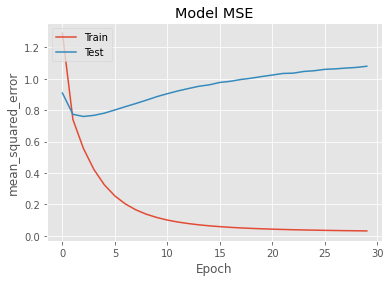

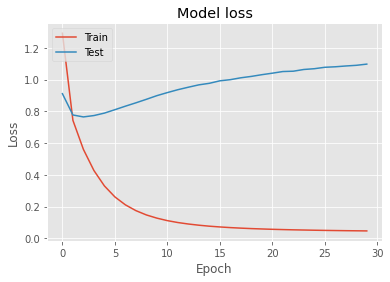


Model: 2,
Minimum RMSE at epoch: 3 = 0.87443810541305


In [ ]:
# Define constants
#K_FACTORS = 100 # The number of dimensional embeddings for movies and users
TEST_USER = 10 # A random test user (user_id = 2000)



model2 =  RecommenderV2(n_users, n_movies, n_factors, min_rating, max_rating)
compile_fit_plot(model2, 2)
user_ratings_2, recommendations_2 = predict_recommend(model2,TEST_USER)



* The model summary shows the new graph. Notice the additional embedding layers with parameter numbers equal to the unique user and movie counts.

In [ ]:
user_ratings_2

,userId,movieId,rating,prediction
744,10,50,5.0,3.188380
745,10,152,4.0,3.053892
746,10,318,4.0,3.659522
747,10,344,3.0,3.372711
748,10,345,4.0,4.281972
749,10,592,3.0,3.383131
750,10,735,4.0,4.623585
751,10,1036,3.0,4.175689
752,10,1089,3.0,3.717844
753,10,1101,2.0,4.696089


In [ ]:
recommendations_2

,movieId,prediction
0,31,4.351665
1,1029,3.370235
2,1061,3.218597
3,1129,2.293016
4,1172,3.501826
...,...,...
99131,64997,NaN
99159,72380,NaN
99274,129,4.041912
99678,4736,4.122317


* Now instead of taking the dot product of the embedding vectors, what if we just `concatenated the embeddings together` and `stuck a fully-connected layer on top of them?` It’s still not technically `deep` but it would at least be a neural network!

* To modify the code, we can remove the bias embeddings from V2 and do a concat on the embedding layers instead. Then we can add some dropout, insert a dense layer, and stick some dropout on the dense layer as well. Finally, we’ll run it through a single-unit dense layer to keep the sigmoid trick at the end.

In [ ]:
from keras.layers import Concatenate, Dense, Dropout

def RecommenderNet(n_users, n_movies, n_factors, min_rating, max_rating):
    user = Input(shape=(1,))
    u = EmbeddingLayer(n_users, n_factors)(user)
    
    movie = Input(shape=(1,))
    m = EmbeddingLayer(n_movies, n_factors)(movie)
    
    x = Concatenate()([u, m])
    x = Dropout(0.05)(x)
    
    x = Dense(10, kernel_initializer='he_normal')(x) # H.L
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = Activation('sigmoid')(x)

    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)  

    model = Model(inputs=[user, movie], outputs=x)

    opt = Adam(lr=0.001)
    
    model.compile(loss='mean_squared_error', optimizer=opt)   
    return model

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 1, 50)        33550       input_5[0][0]                    
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 1, 50)        453300      input_6[0][0]                    
____________________________________________________________________________________________

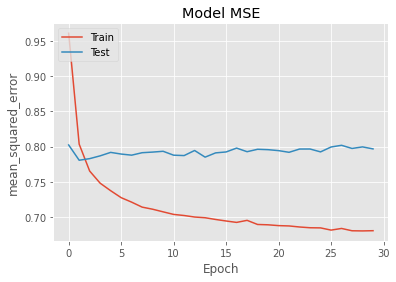

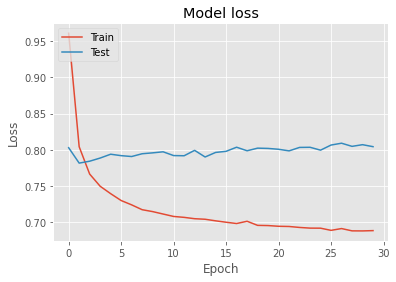


Model: 3,
Minimum RMSE at epoch: 2 = 0.8840063007246706


In [ ]:
# Define constants
#K_FACTORS = 100 # The number of dimensional embeddings for movies and users
TEST_USER = 10 # A random test user (user_id = 2000)



model3 =  RecommenderNet(n_users, n_movies, n_factors, min_rating, max_rating)
compile_fit_plot(model3, 3)
user_ratings_3, recommendations_3 = predict_recommend(model3,TEST_USER)



* Without doing any tuning at all we still managed to get a result that’s pretty close to the best performance we saw with the traditional approach. This technique has the added benefit that we can easily incorporate additional features into the model. For instance, we could create some date features from the timestamp or throw in the movie genres as a new embedding layer. We could tune the size of the movie and user embeddings independently since they no longer need to match. Lots of possibilities here.

In [ ]:
user_ratings_3

,userId,movieId,rating,prediction
744,10,50,5.0,3.640611
745,10,152,4.0,2.982701
746,10,318,4.0,3.334134
747,10,344,3.0,3.337708
748,10,345,4.0,3.434678
749,10,592,3.0,4.050222
750,10,735,4.0,4.696254
751,10,1036,3.0,4.429854
752,10,1089,3.0,3.486741
753,10,1101,2.0,3.970191


In [ ]:
recommendations_3

,movieId,prediction
0,31,4.073483
1,1029,3.428404
2,1061,3.536503
3,1129,3.228808
4,1172,4.250239
...,...,...
99131,64997,NaN
99159,72380,NaN
99274,129,3.999985
99678,4736,4.484697



#### Conclusion

* In this lab session, we showed how to implement NN (deep learning) using Keras to two different problems: 
    1. Customer churn prediction.
    2. How to use a simple deep learning approach to build a recommendation engine for the MovieLens 1M dataset.
